In [1]:
from sqlalchemy import create_engine
import pandas as pd

user = 'jupyter_user'
password = '666-Zelda'
host = 'localhost'
port = '3306'
database = 'football'

engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{database}")

In [2]:
engine.connect()

In [3]:
with open('Football.sql', 'r', encoding='utf-8') as f:
    sql_script = f.read()

import mysql.connector

conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

cursor = conn.cursor()
for statement in sql_script.split(';'):
    if statement.strip():
        cursor.execute(statement)
conn.commit()
cursor.close()
conn.close()

In [6]:
df = pd.read_sql("SELECT * FROM players", engine)
df

,player_id,team_id,name,position,date_of_birth,nationality,age
0,2,264,Juanmi,Offence,1993-05-20,Spain,32
1,8,90,Willian Jose,Offence,1991-11-23,Brazil,33
2,9,100,Diego Llorente,Defence,1993-08-16,Spain,31
3,11,92,Alvaro Odriozola,Defence,1995-12-14,Spain,29
4,14,586,Antonio Sanabria,Offence,1996-03-04,Paraguay,29
...,...,...,...,...,...,...,...
3145,252916,455,Luca Boncori,Offence,2006-02-21,Italy,19
3146,252918,450,Junior Ajayi,Offence,2004-10-11,Ivory Coast,20
3147,252993,558,Yoel Lago,Midfield,2004-03-25,Spain,21
3148,253001,558,Javi Rueda,Defence,2002-05-08,Spain,23


In [7]:
player_nationality = pd.read_sql('SELECT * FROM players WHERE nationality = "Scotland"', engine)
player_nationality

,player_id,team_id,name,position,date_of_birth,nationality,age
0,4359,356,Oliver McBurnie,Offence,1996-06-04,Scotland,28
1,5552,389,Jacob Brown,Offence,1998-04-10,Scotland,27
2,7846,55,Fraser Hornby,Midfield,1999-09-13,Scotland,25
3,7868,64,Andrew Robertson,Defence,1994-03-11,Scotland,31
4,7905,66,Scott McTominay,Midfield,1996-12-08,Scotland,28
5,7930,67,Matt Ritchie,Defence,1989-09-10,Scotland,35
6,15615,92,Kieran Tierney,Defence,1997-06-05,Scotland,27
7,34495,1044,Ryan Christie,Midfield,1995-02-22,Scotland,30
8,34638,103,Lewis Ferguson,Midfield,1999-08-24,Scotland,25
9,34646,58,John McGinn,Midfield,1994-10-18,Scotland,30


In [8]:
player_by_team = pd.read_sql("SELECT p.name,p.position,p.nationality,p.date_of_birth,t.name AS team_name FROM players p LEFT JOIN teams t ON p.team_id = t.team_id ORDER BY t.name", engine)
player_by_team

,name,position,nationality,date_of_birth,team_name
0,Seedy Jarju,Defence,Gambia,2004-10-28,1. FC Heidenheim 1846
1,Luka Janes,Midfield,Germany,2004-01-19,1. FC Heidenheim 1846
2,Elidon Qenaj,Offence,Germany,2003-05-22,1. FC Heidenheim 1846
3,Christopher Negele,Offence,Germany,2005-04-11,1. FC Heidenheim 1846
4,Adrian Beck,Midfield,Germany,1997-06-09,1. FC Heidenheim 1846
...,...,...,...,...,...
3145,Craig Dawson,Defence,England,1990-05-06,Wolverhampton Wanderers
3146,Thomas King,Goalkeeper,Wales,1995-03-09,Wolverhampton Wanderers
3147,Pedro Neto,Offence,Portugal,2000-03-09,Wolverhampton Wanderers
3148,Hwang Heechan,Offence,South Korea,1996-01-26,Wolverhampton Wanderers


In [4]:
continent_map = {
    'Europe': [
        'England', 'Germany', 'Switzerland', 'Spain', 'Netherlands', 'Portugal',
        'Croatia', 'Belgium', 'Norway', 'France', 'Poland', 'Italy', 'Wales',
        'Ireland', 'Greece', 'Scotland', 'Northern Ireland', 'Hungary', 'Romania',
        'Denmark', 'Israel', 'Serbia', 'Finland', 'Slovakia', 'Turkey', 'Czech Republic',
        'Albania', 'Iceland', 'Kosovo', 'Bosnia-Herzegovina', 'Lithuania',
        'Austria', 'Armenia', 'Luxembourg', 'North Macedonia', 'Slovenia',
        'Russia', 'Bulgaria', 'Montenegro', 'Georgia', 'Cyprus', 'Andorra', 'Sweden', 'Ukraine', 'Estonia'
    ],
    'South America': [
        'Brazil', 'Argentina', 'Colombia', 'French Guiana', 'Uruguay', 'Paraguay', 'Ecuador',
        'Chile', 'Peru', 'Venezuela', 'Suriname'
    ],
    'Africa': [
        'Ghana', 'Egypt', 'Cameroon', 'Mali', 'Senegal', 'Morocco', 'Ivory Coast',
        'Nigeria', 'DR Congo', 'Algeria', 'Gabon', 'Zimbabwe', 'Tunisia', 'Togo',
        'Guinea', 'Angola', 'Congo', 'Zambia', 'Equatorial Guinea',
        'Mozambique', 'Benin', 'Cape Verde Islands', 'Comoros',
        'Central African Republic', 'Burundi', 'Guinea-Bissau', 'Kenya', 'Burkina Faso', 'South Africa', 'Gambia'
    ],
    'North America': [
        'USA', 'Canada', 'Mexico'
    ],
    'Central America': [
        'Costa Rica', 'Grenada', 'Dominican Republic',
        'Honduras', 'Panama', 'Guadeloupe', 'Martinique', 'Haiti', 'Jamaica'
    ],
    'Asia': [
        'Japan', 'South Korea', 'Iran', 'Uzbekistan', 'Philippines', 'Jordan',
        'Syria'
    ],
    'Oceania': [
        'Australia', 'New Zealand'
    ]
}

country_to_continent = {}
for continent, countries in continent_map.items():
    for country in countries:
        country_to_continent[country] = continent

In [10]:
immigrants_league = pd.read_sql(
    """
    WITH player_data AS (
        SELECT 
            p.player_id,
            p.name AS player_name,
            p.nationality,
            t.team_id,
            t.name AS team_name,
            s.position AS team_ranking,
            l.league_id,
            l.name AS league_name,
            CASE
                WHEN l.name = 'Premier League' AND p.nationality IN ('England', 'Wales') THEN 0
                WHEN l.name = 'Serie A' AND p.nationality = 'Italy' THEN 0
                WHEN l.name = 'La Liga' AND p.nationality = 'Spain' THEN 0
                WHEN l.name = 'Bundesliga' AND p.nationality = 'Germany' THEN 0
                WHEN l.name = 'Ligue 1' AND p.nationality = 'France' THEN 0
                ELSE 1
            END AS is_immigrant
        FROM players p
        JOIN teams t ON p.team_id = t.team_id
        JOIN leagues l ON t.league_id = l.league_id
        JOIN standings s ON t.team_id = s.team_id
    ),
    nationality_counts AS (
        SELECT 
            league_name,
            nationality,
            COUNT(*) AS num_players
        FROM player_data
        WHERE is_immigrant = 1
        GROUP BY league_name, nationality
    ),
    nationality_summary AS (
        SELECT
            league_name,
            GROUP_CONCAT(CONCAT(nationality, ' (', num_players, ')') ORDER BY num_players DESC SEPARATOR ', ') AS immigrant_nationality_breakdown
        FROM nationality_counts
        GROUP BY league_name
    ),
    league_stats AS (
        SELECT 
            league_name,
            COUNT(*) AS total_players,
            SUM(is_immigrant) AS immigrant_players,
            ROUND(100.0 * SUM(is_immigrant) / COUNT(*), 2) AS immigrant_percentage
        FROM player_data
        GROUP BY league_name
    )
    SELECT
        ls.league_name,
        ls.total_players,
        ls.immigrant_players,
        ls.immigrant_percentage,
        ns.immigrant_nationality_breakdown
    FROM league_stats ls
    LEFT JOIN nationality_summary ns ON ls.league_name = ns.league_name
    ORDER BY ls.immigrant_percentage DESC
    """,
    engine
)

In [26]:
immigrants_team = pd.read_sql(
    """
    WITH player_data AS (
        SELECT 
            p.player_id,
            p.name AS player_name,
            p.nationality,
            t.team_id,
            t.name AS team_name,
            s.position AS team_ranking,
            l.league_id,
            l.name AS league_name,
            CASE
                WHEN l.name = 'Premier League' AND p.nationality IN ('England', 'Wales') THEN 0
                WHEN l.name = 'Serie A' AND p.nationality = 'Italy' THEN 0
                WHEN l.name = 'La Liga' AND p.nationality = 'Spain' THEN 0
                WHEN l.name = 'Bundesliga' AND p.nationality = 'Germany' THEN 0
                WHEN l.name = 'Ligue 1' AND p.nationality = 'France' THEN 0
                ELSE 1
            END AS is_immigrant
        FROM players p
        JOIN standings s ON s.team_id = p.team_id
        JOIN teams t ON p.team_id = t.team_id
        JOIN leagues l ON t.league_id = l.league_id
    ),
    nationality_counts AS (
        SELECT 
            team_name,
            league_name,
            nationality,
            COUNT(*) AS num_players
        FROM player_data
        GROUP BY team_name, league_name, nationality
    ),
    nationality_summary AS (
        SELECT 
            team_name,
            league_name,
            GROUP_CONCAT(CONCAT(nationality, ' (', num_players, ')') ORDER BY num_players DESC SEPARATOR ', ') AS player_nationality_breakdown
        FROM nationality_counts
        GROUP BY team_name, league_name
    ),
    team_stats AS (
        SELECT 
            league_name,
            team_name,
            team_ranking,
            COUNT(*) AS team_total_players,
            SUM(is_immigrant) AS team_immigrant_players,
            ROUND(100 * SUM(is_immigrant) / COUNT(*), 2) AS team_immigrant_percentage
        FROM player_data
        GROUP BY league_name, team_name, team_ranking
    )
    SELECT *
    FROM (
        SELECT 
            ts.league_name,
            ts.team_name,
            ts.team_ranking,
            ts.team_total_players,
            ts.team_immigrant_players,
            ts.team_immigrant_percentage,
            ns.player_nationality_breakdown,
            ROW_NUMBER() OVER (PARTITION BY ts.league_name ORDER BY ts.team_immigrant_percentage DESC) as rn
        FROM team_stats ts
        JOIN nationality_summary ns
        ON ts.team_name = ns.team_name AND ts.league_name = ns.league_name
    ) ranked
    WHERE rn = 1
    ORDER BY league_name
    """,
    engine)

In [27]:
immigrants_team

,league_name,team_name,team_ranking,team_total_players,team_immigrant_players,team_immigrant_percentage,player_nationality_breakdown,rn
0,Bundesliga,Bayer 04 Leverkusen,1,29,20.0,68.97,"Germany (9), Czech Republic (3), Netherlands (...",1
1,La Liga,Real Madrid CF,1,36,18.0,50.00,"Spain (18), France (4), Brazil (4), Germany (2...",1
2,Ligue 1,Olympique Lyonnais,6,29,20.0,68.97,"France (9), Brazil (3), Ivory Coast (2), Belgi...",1
3,Premier League,Fulham,13,29,23.0,79.31,"England (5), Brazil (3), USA (2), Nigeria (2),...",1
4,Serie A,Udinese Calcio,15,34,28.0,82.35,"Italy (6), Slovenia (4), Argentina (4), Nigeri...",1


Loaded crest for Real Madrid CF: 5.7x0.5 at (58.0-63.7, -0.2-0.2)
Loaded crest for Bayer 04 Leverkusen: 5.7x0.5 at (77.0-82.7, 0.8-1.2)
Loaded crest for Olympique Lyonnais: 5.7x0.5 at (77.0-82.7, 1.8-2.2)
Loaded crest for Fulham: 5.7x0.5 at (87.3-93.0, 2.8-3.2)
Loaded crest for Udinese Calcio: 5.7x0.5 at (90.3-96.0, 3.8-4.2)
Number of teams: 5
Team percentages: [50.0, 68.97, 68.97, 79.31, 82.35]


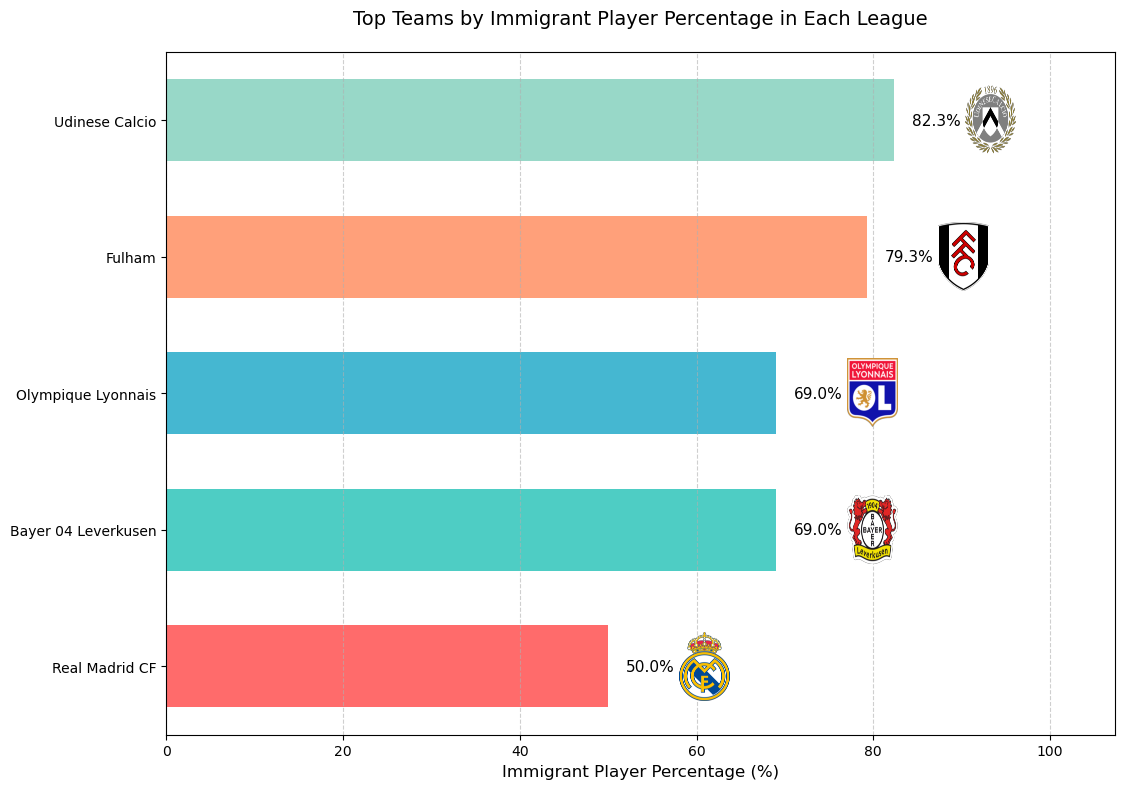

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image
import numpy as np

# Use the actual immigrants_team dataframe (defined elsewhere)
# Sort by percentage for better visualization
immigrants_team_sorted = immigrants_team.sort_values('team_immigrant_percentage', ascending=True).reset_index(drop=True)

# Define different colors for each bar
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E9', '#F8C471', '#82E0AA']

# Plot setup
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.barh(
    range(len(immigrants_team_sorted)),
    immigrants_team_sorted["team_immigrant_percentage"],
    color=colors[:len(immigrants_team_sorted)],
    height=0.6
)

# Set y-tick labels to team names
ax.set_yticks(range(len(immigrants_team_sorted)))
ax.set_yticklabels(immigrants_team_sorted["team_name"])

# Add percentage labels and crests
for i, bar in enumerate(bars):
    width = bar.get_width()
    y_center = bar.get_y() + bar.get_height() / 2
    bar_height = bar.get_height()
    
    # Add percentage text to the right of the bar
    text_x = width + 2
    ax.text(text_x, y_center, f"{width:.1f}%", va='center', fontsize=11, ha='left')

    # Load and display crest to the right of the percentage text
    team_name = immigrants_team_sorted.iloc[i]['team_name']
    crest_path = f"Crests/{team_name}.png"
    
    if os.path.exists(crest_path):
        try:
            # Load image
            img = Image.open(crest_path)
            
            # BRUTE FORCE: Fixed dimensions in data coordinates
            # Adjust these values to get the size you want
            crest_width = 5.7   # Fixed width in data coordinates
            crest_height = 0.5  # Fixed height in data coordinates
            
            # Position crest to the right of the percentage text
            crest_spacing = 6
            x0 = text_x + crest_spacing
            x1 = x0 + crest_width
            y0 = y_center - (crest_height / 2)
            y1 = y_center + (crest_height / 2)
            
            # Display the image with fixed dimensions (no rotation)
            ax.imshow(img, extent=(x0, x1, y0, y1), aspect='auto', zorder=10)
            
            print(f"Loaded crest for {team_name}: {crest_width}x{crest_height} at ({x0:.1f}-{x1:.1f}, {y0:.1f}-{y1:.1f})")

        except Exception as e:
            print(f"Error loading crest for {team_name}: {e}")
    else:
        print(f"Crest file not found: {crest_path}")

# Chart formatting
ax.set_xlabel("Immigrant Player Percentage (%)", fontsize=12)
ax.set_title("Top Teams by Immigrant Player Percentage in Each League", fontsize=14, pad=20)

# Set appropriate axis limits
max_percentage = immigrants_team_sorted["team_immigrant_percentage"].max()
ax.set_xlim(0, max_percentage + 25)
ax.set_ylim(-0.5, len(immigrants_team_sorted) - 0.5)

ax.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.8)

# Debug info
print(f"Number of teams: {len(immigrants_team_sorted)}")
print(f"Team percentages: {immigrants_team_sorted['team_immigrant_percentage'].tolist()}")

plt.show()

In [12]:
import re
from collections import Counter

def get_most_represented_continent(breakdown_str):
    if not breakdown_str:
        return None
    
    country_counts = Counter()
    
    for match in re.findall(r'([A-Za-z\s\-]+) \((\d+)\)', breakdown_str):
        country, count = match
        country = country.strip()
        count = int(count)
        continent = country_to_continent.get(country)
        if continent:
            country_counts[continent] += count

    if not country_counts:
        return None
    
    top_2 = country_counts.most_common(2)
    return ', '.join([f"{continent} ({count})" for continent, count in top_2])

immigrants_team["top_immigrant_continents"] = immigrants_team["player_nationality_breakdown"].apply(get_most_represented_continent)

immigrants_league["top_immigrant_continents"] = immigrants_league["immigrant_nationality_breakdown"].apply(get_most_represented_continent)


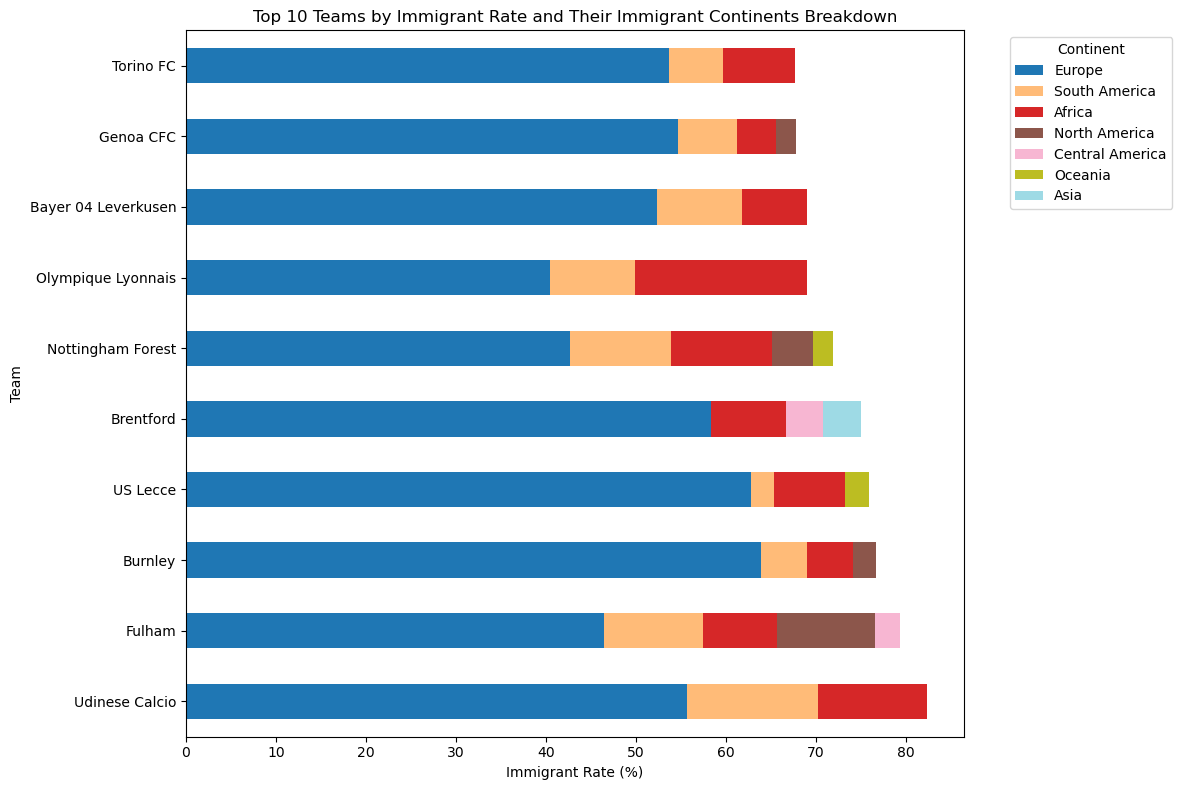

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# Let's assume 'immigrants_team' is your DataFrame with the relevant columns
df = immigrants_team.copy()

# Filter top 10 teams by immigrant rate
top10 = df.sort_values('team_immigrant_percentage', ascending=False).head(10)

# Parse nationality breakdown into dict with counts per nationality
def parse_breakdown(breakdown_str):
    nat_counts = {}
    for part in breakdown_str.split(', '):
        if ' (' in part:
            nat, count = part.split(' (')
            count = int(count[:-1])
            nat_counts[nat] = count
    return nat_counts

# Reverse continent_map for quick lookup: country -> continent
country_to_continent = {}
for cont, countries in continent_map.items():
    for c in countries:
        country_to_continent[c] = cont

# Build a DataFrame where each row is a team and columns are continents with counts of immigrant players
continent_counts = []
for idx, row in top10.iterrows():
    nat_counts = parse_breakdown(row['player_nationality_breakdown'])
    cont_count = {}
    for nat, count in nat_counts.items():
        cont = country_to_continent.get(nat, 'Other')
        cont_count[cont] = cont_count.get(cont, 0) + count
    continent_counts.append(cont_count)

continent_df = pd.DataFrame(continent_counts).fillna(0).astype(int)
continent_df.index = top10['team_name']

# Normalize by immigrant players count per team to get proportion per continent
continent_props = continent_df.div(continent_df.sum(axis=1), axis=0)

# Multiply proportions by immigrant rate (percentage) to get bar sizes for each continent
bar_data = continent_props.multiply(top10.set_index('team_name')['team_immigrant_percentage'], axis=0)

# Plot stacked horizontal bar chart
ax = bar_data.plot(kind='barh', stacked=True, figsize=(12, 8), colormap='tab20')

plt.xlabel('Immigrant Rate (%)')
plt.ylabel('Team')
plt.title('Top 10 Teams by Immigrant Rate and Their Immigrant Continents Breakdown')
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [38]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


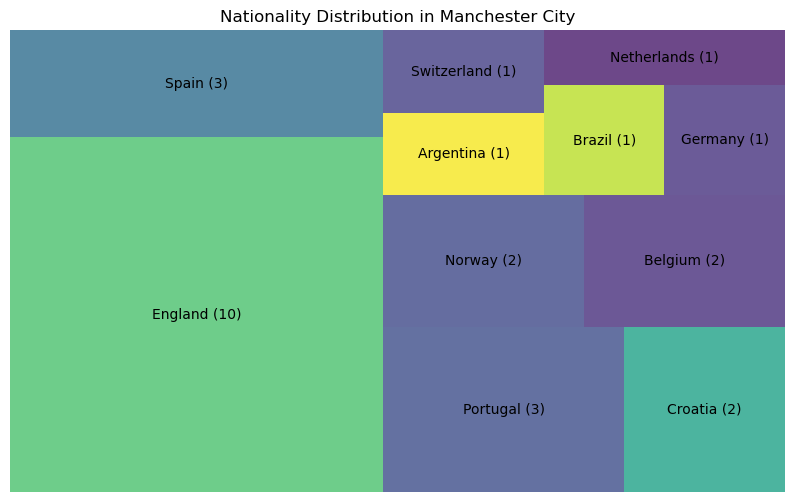

In [39]:
import squarify

team = "Manchester City"  # replace with any team from your df
team_row = immigrants_team[immigrants_team['team_name'] == team]
nation_counts = team_row['player_nationality_breakdown'].values[0].split(', ')
labels = [f"{n.split(' (')[0]} ({n.split(' (')[1][:-1]})" for n in nation_counts]
sizes = [int(n.split(' (')[1][:-1]) for n in nation_counts]

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.8)
plt.axis('off')
plt.title(f'Nationality Distribution in {team}')
plt.show()

In [15]:
immigrants_country = pd.read_sql(
    """
    WITH player_data AS (
        SELECT 
            p.player_id,
            p.nationality,
            l.name AS league_name,
            CASE
                WHEN l.name = 'Premier League' AND p.nationality IN ('England', 'Wales') THEN 0
                WHEN l.name = 'Serie A' AND p.nationality = 'Italy' THEN 0
                WHEN l.name = 'La Liga' AND p.nationality = 'Spain' THEN 0
                WHEN l.name = 'Bundesliga' AND p.nationality = 'Germany' THEN 0
                WHEN l.name = 'Ligue 1' AND p.nationality = 'France' THEN 0
                ELSE 1
            END AS is_immigrant,
            p.age
        FROM players p
        JOIN teams t ON p.team_id = t.team_id
        JOIN leagues l ON t.league_id = l.league_id
    ),
    filtered_data AS (
        SELECT * FROM player_data WHERE is_immigrant = 1
    ),
    nationality_dest_counts AS (
        SELECT 
            nationality,
            league_name,
            COUNT(*) AS players_in_league
        FROM filtered_data
        GROUP BY nationality, league_name
    ),
    destination_summary AS (
        SELECT 
            nationality,
            GROUP_CONCAT(CONCAT(league_name, ' (', players_in_league, ')') ORDER BY players_in_league DESC SEPARATOR ', ') AS destination_breakdown
        FROM nationality_dest_counts
        GROUP BY nationality
    ),
    nationality_stats AS (
        SELECT 
            nationality,
            COUNT(*) AS num_players,
            ROUND(AVG(age), 1) AS avg_age
        FROM filtered_data
        GROUP BY nationality
    )
    SELECT 
        ns.nationality,
        ns.num_players,
        ns.avg_age,
        ds.destination_breakdown
    FROM nationality_stats ns
    LEFT JOIN destination_summary ds ON ns.nationality = ds.nationality
    ORDER BY ns.num_players DESC
    """,
    engine
)

immigrants_country["continent"] = immigrants_country["nationality"].map(country_to_continent)

immigrants_country

,nationality,num_players,avg_age,destination_breakdown,continent
0,France,120,26.0,"Serie A (35), Premier League (32), Bundesliga ...",Europe
1,Brazil,95,26.9,"Premier League (29), Serie A (24), La Liga (19...",South America
2,Argentina,73,27.4,"La Liga (27), Serie A (25), Premier League (14...",South America
3,Portugal,69,26.2,"Premier League (22), Ligue 1 (15), Serie A (14...",Europe
4,Netherlands,59,27.3,"Premier League (18), Serie A (17), Bundesliga ...",Europe
...,...,...,...,...,...
101,Jordan,1,27.0,Ligue 1 (1),Asia
102,Burundi,1,26.0,Ligue 1 (1),Africa
103,Guinea-Bissau,1,29.0,Ligue 1 (1),Africa
104,French Guiana,1,32.0,Ligue 1 (1),South America


In [20]:
country_df = pd.read_csv('immigrants_country.csv')
continent_summary = country_df.groupby('continent')['num_players'].sum().reset_index()
continent_summary['percentage'] = (continent_summary['num_players'] / continent_summary['num_players'].sum()) * 100
continent_summary = continent_summary.sort_values(by='percentage', ascending=False)

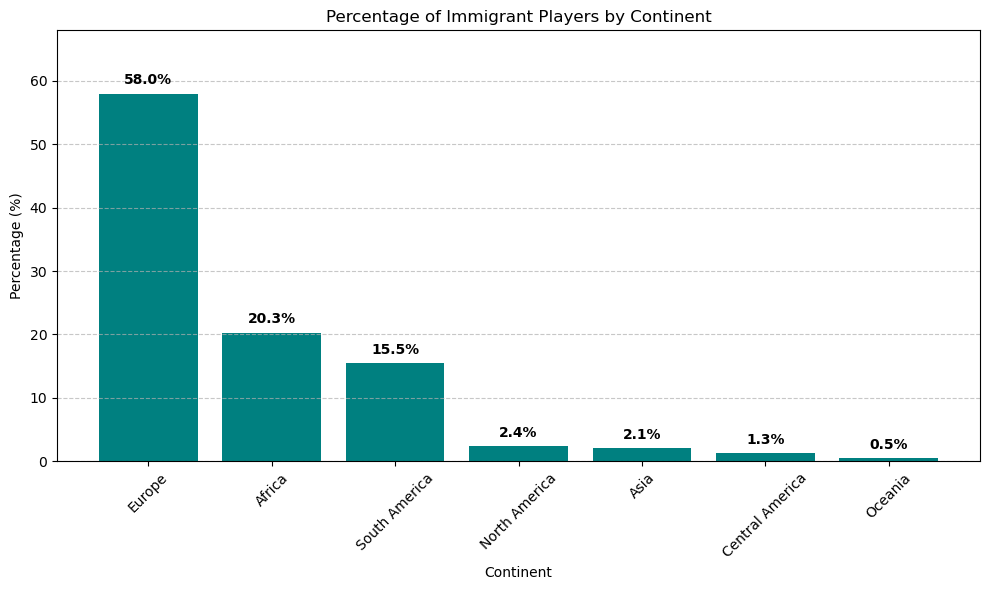

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(continent_summary['continent'], continent_summary['percentage'], color='teal')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Percentage of Immigrant Players by Continent')
plt.xlabel('Continent')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.ylim(0, max(continent_summary['percentage']) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [34]:
op = pd.read_csv('oldest_by_position.csv')

op

,Unnamed: 0,player_id,team_id,name,position,date_of_birth,nationality,age,team
0,0,193091,10,Raul Paula,Midfield,1976-06-26,Germany,48,VfB Stuttgart
1,1,3271,19,Makoto Hasebe,Defence,1984-01-18,Japan,41,Eintracht Frankfurt
2,2,3739,87,Radamel Falcao,Offence,1986-02-10,Colombia,39,Rayo Vallecano de Madrid
3,3,2175,471,Gianluca Pegolo,Goalkeeper,1981-03-25,Italy,44,US Sassuolo Calcio
4,4,8425,522,Dante,Defence,1983-10-18,Brazil,41,OGC Nice


In [35]:
yp = pd.read_csv('youngest_by_position.csv')

yp

,Unnamed: 0.1,Unnamed: 0,player_id,team_id,name,position,date_of_birth,nationality,age,team
0,2,2,247243,61,Ollie Harrison,Midfield,2007-08-07,England,17,Chelsea
1,3,3,230517,64,Trey Nyoni,Midfield,2007-06-30,England,17,Liverpool
2,4,4,251079,73,Mikey Moore,Offence,2007-08-11,England,17,Tottenham Hotspur
3,5,5,202283,81,Lamine Yamal,Offence,2007-07-13,Spain,17,FC Barcelona
4,6,6,244743,95,David Otorbi,Offence,2007-10-16,Spain,17,Valencia CF
5,7,7,242550,98,Francesco Camarda,Offence,2008-03-10,Italy,17,AC Milan
6,8,8,215588,115,David Pejicic,Midfield,2007-06-14,Slovenia,17,Udinese Calcio
7,9,9,250948,516,Darryl Bakola,Offence,2007-11-30,France,17,Olympique de Marseille
8,10,10,221819,521,Ayyoub Bouaddi,Midfield,2007-10-02,France,17,Lille OSC
